# Imports

In [1]:
import acquire as a
import prepare as p
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from wordcloud import WordCloud
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('NLP_df.csv', index_col=0)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df = df.drop_duplicates()

In [ ]:
javascript_words = p.basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
python_words = p.basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
go_words = p.basic_clean(' '.join(df[df.language == 'Go'].readme_contents))
java_words = p.basic_clean(' '.join(df[df.language == 'Java'].readme_contents))

In [ ]:
stopword_list = stopwords.words('english')

In [ ]:
javascript_words = p.remove_stopwords(javascript_words)
javascript_words = p.remove_stopwords(javascript_words)

In [ ]:
language_words = [javascript_words, python_words, go_words, java_words]

In [ ]:
for i in language_words:
    i = p.remove_stopwords(i)

In [ ]:
df.shape

---

# Creating Acquire and Prep Files

In [3]:
# def get_github_data():
#     df = pd.read_csv('NLP_df.csv', index_col=0)
#     df = df.reset_index(drop=True)
#     return df 

In [2]:
df = a.get_github_data()
df

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
...,...,...,...
107,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m..."
108,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w..."
109,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...
110,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...


In [3]:
df = p.prep_github_data(df, 'readme_contents')

In [4]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5190,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5629,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560


In [35]:
#df["clean"]= df["clean"].str.replace("&#9;", "")

In [30]:
#df["clean"].replace({"&#9;": ""}, inplace=True)

In [36]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5199,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5633,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11976,561


In [5]:
# #split the stuff here
# def split(df):
#     '''splitting our data, stratifying language.'''
#     train_validate, test = train_test_split(df, test_size=.2, 
#                                         random_state=123, 
#                                         stratify=df.language)
#     train, validate = train_test_split(train_validate, test_size=.3, 
#                                    random_state=123, 
#                                    stratify=train_validate.language)
#     return train, validate, test

In [4]:
train, validate, test = p.split(df)

In [5]:
train.shape, validate.shape, test.shape

((59, 9), (26, 9), (22, 9))

In [6]:
#not sure if I should stem or lemmatize yet
javascript_words = ' '.join(train[train.language == 'JavaScript'].clean)
python_words = ' '.join(train[train.language == 'Python'].clean)
java_words = ' '.join(train[train.language == 'Java'].clean)
go_words = ' '.join(train[train.language == 'Go'].clean)
all_words = ' '.join(train.clean)

In [7]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [8]:
word_counts = pd.concat([javascript_freq, python_freq, java_freq, go_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'python','java','go','all']
word_counts.head()

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
icon,430,0,0,0,430
freewarefreeware,395,0,0,0,395
const,388,0,0,0,388


In [8]:
word_counts.sort_values('all', ascending=False).head(10)

,javascript,python,java,go,all
go,135,54,2,1121,1312
source,943,74,37,60,1114
yes,3,1022,0,0,1025
javascript,821,43,2,5,871
library,46,392,30,360,828
data,174,516,26,107,823
python,163,629,8,6,806
use,292,219,32,110,653
unknown,0,626,0,2,628
using,206,179,25,140,550


Text(0.5, 0, '\nFrequency')

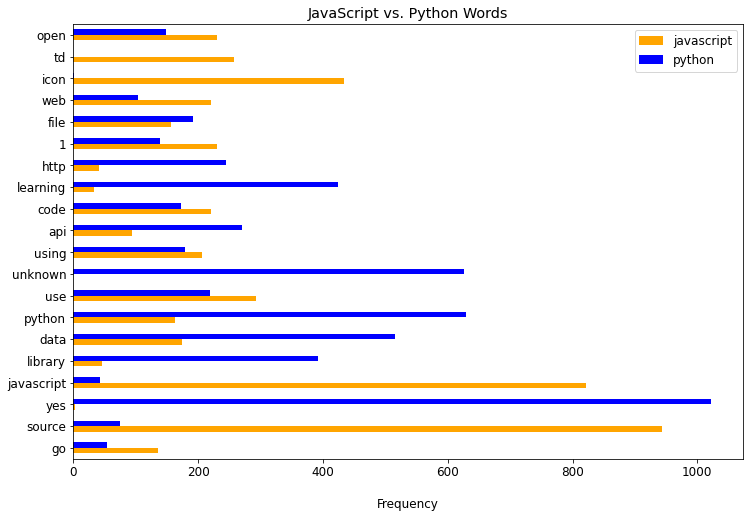

In [14]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
plt.title('JavaScript vs. Python Words')
plt.xlabel('\nFrequency')

Text(0.5, 0, '\nFrequency')

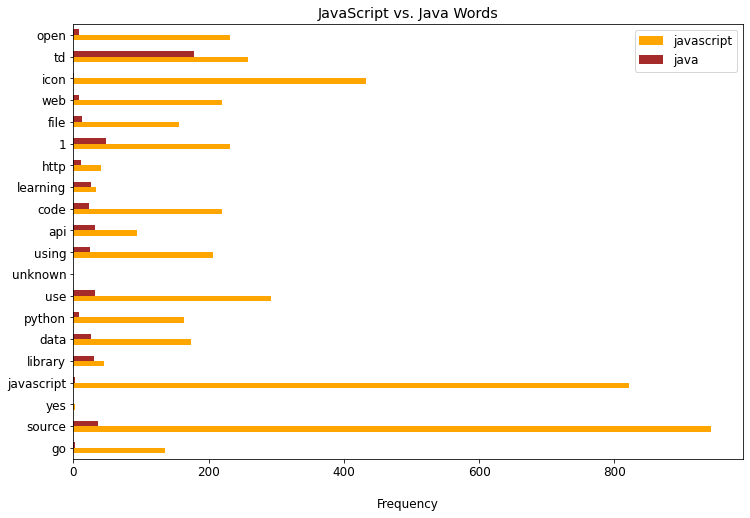

In [15]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "javascript": "orange"})
plt.title('JavaScript vs. Java Words')
plt.xlabel('\nFrequency')

Text(0.5, 0, '\nFrequency')

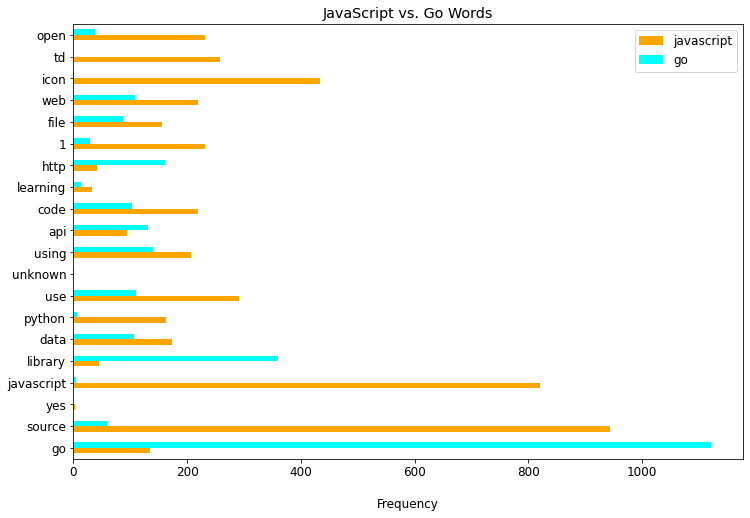

In [16]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "javascript": "orange"})
plt.title('JavaScript vs. Go Words')
plt.xlabel('\nFrequency')

In [32]:
word_counts

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
icon,430,0,0,0,430
freewarefreeware,395,0,0,0,395
const,388,0,0,0,388
...,...,...,...,...,...
activehttpsgithubcomgohugoiohugopulsemonthly,0,0,0,1,1
englishenprefacemd,0,0,0,1,1
licensehttpsgithubcomprometheusprometheusblobmainlicense,0,0,0,1,1
githubcomgooglewirev040,0,0,0,1,1


In [17]:
def javascript_barh():
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
    plt.title('JavaScript vs. Python Words')
    plt.xlabel('\nFrequency')
    plt.show()

    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "javascript": "orange"})
    plt.title('JavaScript vs. Java Words')
    plt.xlabel('\nFrequency')
    plt.show()
    
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "javascript": "orange"})
    plt.title('JavaScript vs. Go Words')
    plt.xlabel('\nFrequency')
    plt.show()

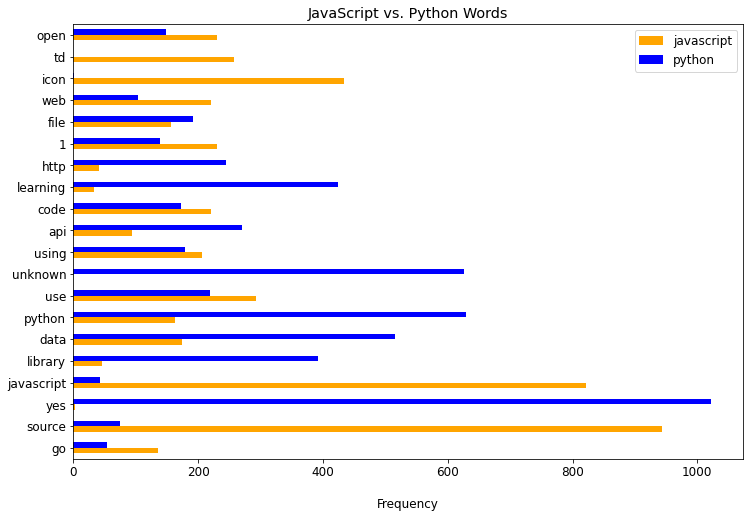

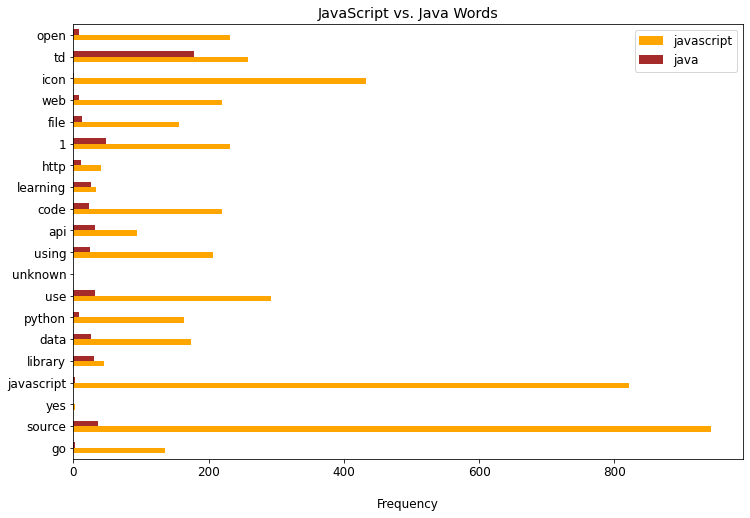

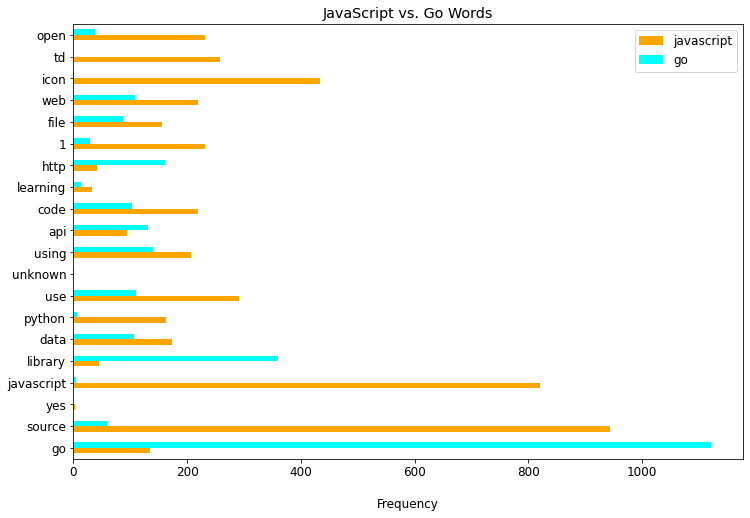

In [18]:
javascript_barh()

In [19]:
def python_barh():
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
    plt.title('JavaScript vs. Python Words')
    plt.xlabel('\nFrequency')
    plt.show()

    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['python', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "python": "blue"})
    plt.title('Python vs. Java Words')
    plt.xlabel('\nFrequency')
    plt.show()
    
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['python', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "python": "blue"})
    plt.title('Python vs. Go Words')
    plt.xlabel('\nFrequency')
    plt.show()

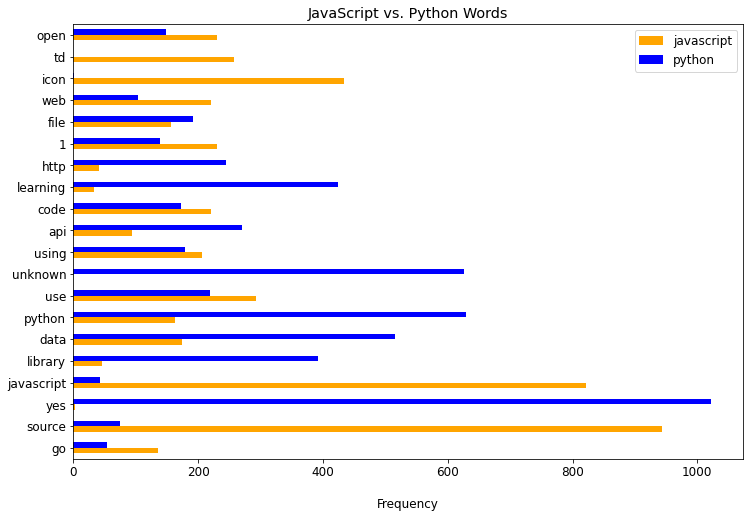

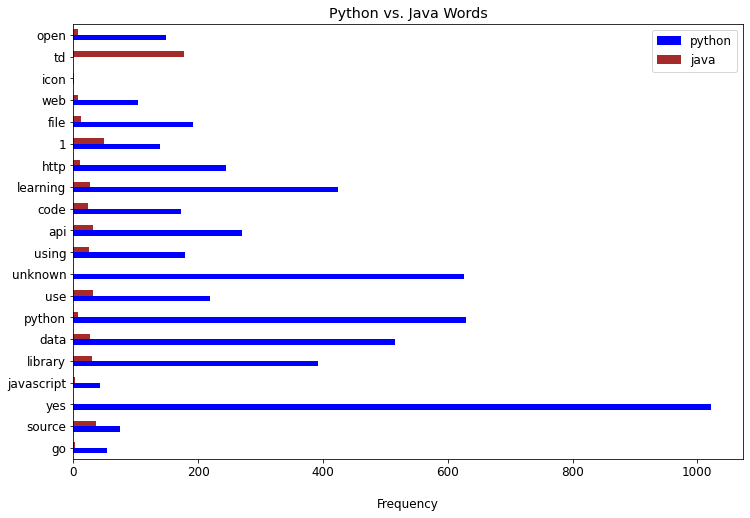

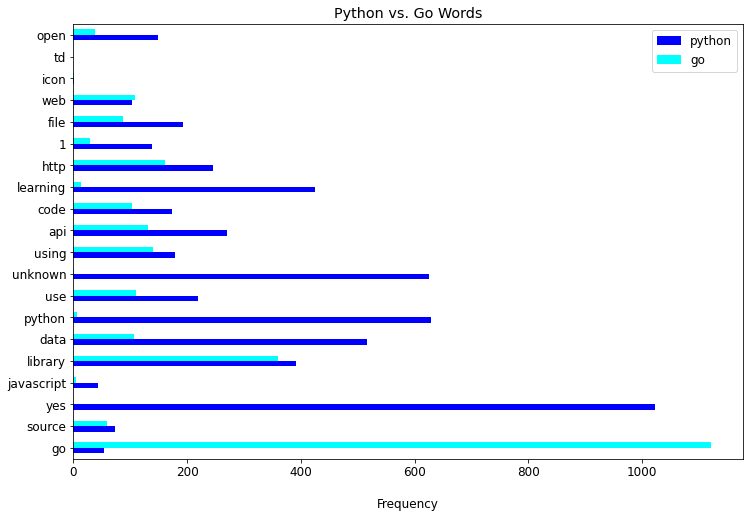

In [20]:
python_barh()

<Figure size 1152x720 with 0 Axes>

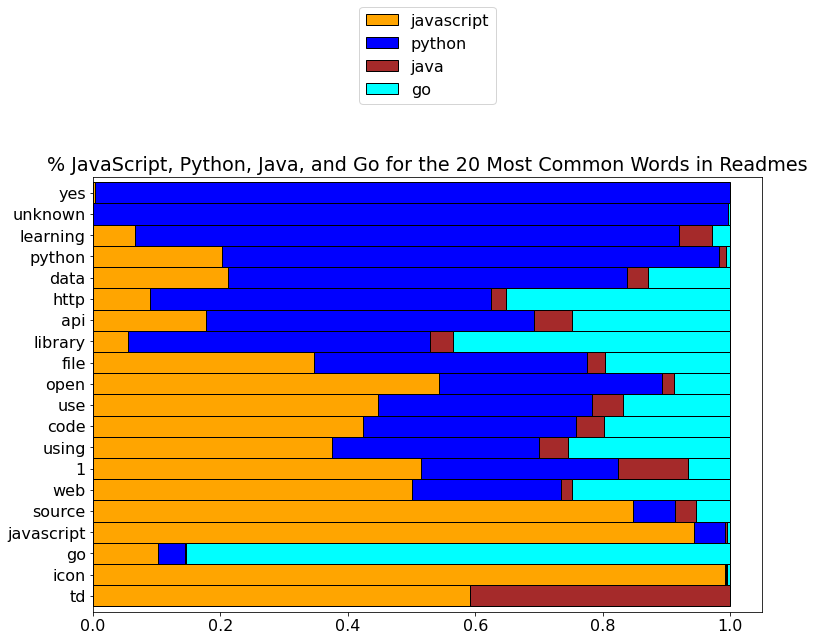

In [21]:
plt.figure(figsize=(16, 10))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='python')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(12,8), color={"go": "aqua", "python": "blue", "javascript": "orange", "java":"brown"}))
plt.title('% JavaScript, Python, Java, and Go for the 20 Most Common Words in Readmes')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15))
#plt.gca().xaxis.set_major_formatter(plt.ticker.FuncFormatter('{:.0%}'.format))

(-0.5, 999.5, 599.5, -0.5)

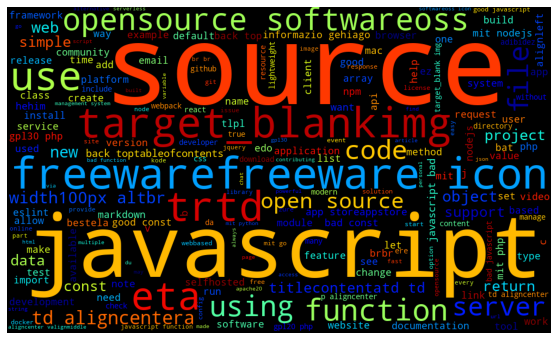

In [84]:
img = WordCloud(background_color='black', colormap = 'jet', width=1000, height=600).generate(javascript_words)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')

In [22]:
def simple_wordcloud(language):
    img = WordCloud(background_color='black', colormap = 'jet', width=800, height=600).generate(language)
    plt.figure(figsize=(12,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

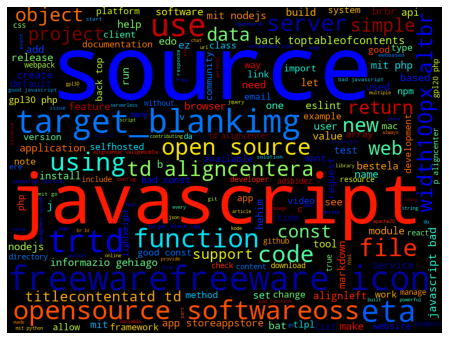

In [23]:
simple_wordcloud(javascript_words)

In [24]:
language_words = [javascript_words,python_words,java_words,go_words]

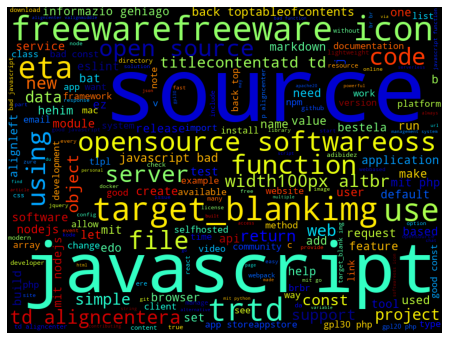

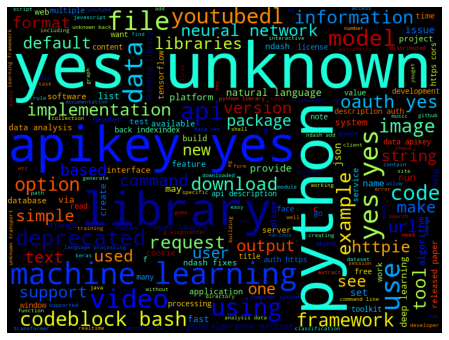

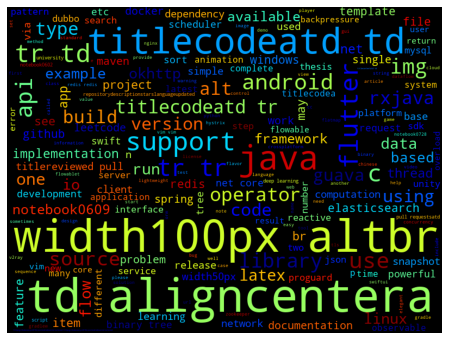

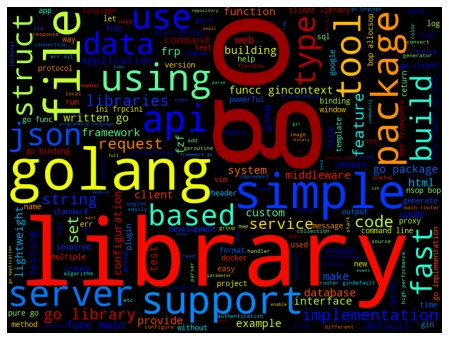

In [25]:
for i in language_words:
    simple_wordcloud(i)
    print('\n')

In [13]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5199,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5633,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11976,561


In [14]:
# import nltk.sentiment
# sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [16]:
#df['sentiment'] = df.clean.apply(lambda doc: sia.polarity_scores(doc)['compound'])

<AxesSubplot:ylabel='Frequency'>

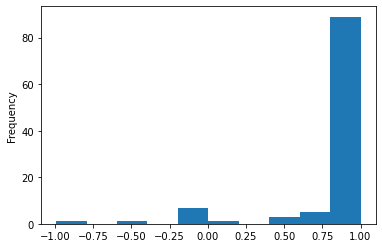

In [18]:
#df.sentiment.plot.hist()

In [27]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5199,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5633,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11976,561


In [26]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts()

(freewarefreeware, icon)                                                                                                                        364
(opensource, softwareoss)                                                                                                                       234
(open, source)                                                                                                                                  166
(width100px, altbr)                                                                                                                             151
(td, aligncentera)                                                                                                                              151
                                                                                                                                               ... 
(python, missionkontrolhttpswwwmissionkontrolio)                                                                

In [28]:
pd.Series(nltk.bigrams(python_words.split())).value_counts()

(yes, unknown)            536
(apikey, yes)             319
(machine, learning)       276
(yes, yes)                213
(codeblock, bash)         132
                         ... 
(affirmations, yes)         1
(apply, testpy)             1
(codes, neighborhoods)      1
(20, slow_commands)         1
(parameter, default)        1
Length: 40800, dtype: int64

In [29]:
pd.Series(nltk.bigrams(java_words.split())).value_counts()

(width100px, altbr)                                                                        172
(td, aligncentera)                                                                         172
(titlecodeatd, td)                                                                         100
(tr, td)                                                                                    45
(tr, tr)                                                                                    42
                                                                                          ... 
(unity, coder39kdart0720)                                                                    1
(authorization, chinese)                                                                     1
(cortesebsubabr, hrefhttpsgithubcomiluwatarjavadesignpatternscommitsauthorluigicortese)      1
(allcontributorslist, end)                                                                   1
(string, runstring)                               

In [30]:
pd.Series(nltk.bigrams(go_words.split())).value_counts()

(go, library)                66
(funcc, gincontext)          62
(written, go)                56
(go, package)                55
(func, main)                 51
                             ..
(gin, sh)                     1
(financial, markets)          1
(ok, cjsonhttpstatusok)       1
(neo, minimal)                1
(cascade, initialization)     1
Length: 24729, dtype: int64

In [31]:
pd.Series(nltk.bigrams(all_words.split())).value_counts()

(yes, unknown)                                                     536
(freewarefreeware, icon)                                           364
(td, aligncentera)                                                 323
(width100px, altbr)                                                323
(apikey, yes)                                                      319
                                                                  ... 
(nsop, 16272)                                                        1
(telegram, mtprotohttpscoretelegramorgapigettingstarted)             1
(library, pyfilesystem2httpsgithubcompyfilesystempyfilesystem2)      1
(b, let)                                                             1
(want, execute)                                                      1
Length: 134161, dtype: int64

In [36]:
df.head()

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170


In [25]:
train.head()

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
13,ytdl-org/youtube-dl,Python,[![Build Status](https://github.com/ytdl-org/y...,[![Build Status](https://github.com/ytdl-org/y...,build statushttpsgithubcomytdlorgyoutubedlwork...,build statushttpsgithubcomytdlorgyoutubedlwork...,build statushttpsgithubcomytdlorgyoutubedlwork...,57861,6995
100,prometheus/prometheus,Go,# Prometheus\n\n[![CircleCI](https://circleci....,# Prometheus\n\n[![CircleCI](https://circleci....,prometheus circlecihttpscirclecicomghprometheu...,prometheu circlecihttpscirclecicomghprometheus...,prometheus circlecihttpscirclecicomghprometheu...,4596,395
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560
50,httpie/httpie,Python,HTTPie: human-friendly CLI HTTP client for the...,HTTPie: human-friendly CLI HTTP client for the...,httpie humanfriendly cli http client api era h...,httpie humanfriendli cli http client api era h...,httpie humanfriendly cli http client api era h...,38518,4677
12,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...,# Awesome Python [![Awesome](https://cdn.rawgi...,awesome python awesomehttpscdnrawgitcomsindres...,awesom python awesomehttpscdnrawgitcomsindreso...,awesome python awesomehttpscdnrawgitcomsindres...,70145,5604


# Model

In [72]:
#df.clean should be train.clean
tfidf = TfidfVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(df.clean)
y = df.language

#insert X_validate, and y_validate
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify = y)

In [73]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=.2, random_state=12, stratify= y_train_validate)

### Decision Tree

In [74]:
#df.clean should be train.clean
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(train.clean)
# y = train.language

# #insert X_validate, and y_validate
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify = y)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

tree.score(X_train, y_train)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))


train['predicted'] = tree.predict(X_train)
test['predicted'] = tree.predict(X_test)

In [75]:
print(f'train score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

train score: 79.41%
validate score: 64.71%


In [76]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 79.41%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
Java         0     6           0       0
JavaScript   8     3          35       2
Python       0     1           0      13
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       1.00      0.60      0.75        10
  JavaScript       0.73      1.00      0.84        35
      Python       0.93      0.87      0.90        15

    accuracy                           0.79        68
   macro avg       0.66      0.62      0.62        68
weighted avg       0.73      0.79      0.74        68



In [77]:
print(f'train score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

train score: 79.41%
validate score: 64.71%


In [78]:
#decision tree scores
tree_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
tree_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Decision Tree!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {tree_precision}')
print(f'recall score is {tree_recall}')

Scores for Decision Tree!
---------------------------
accuracy score is 0.79
precision score is 0.66
recall score is 0.62


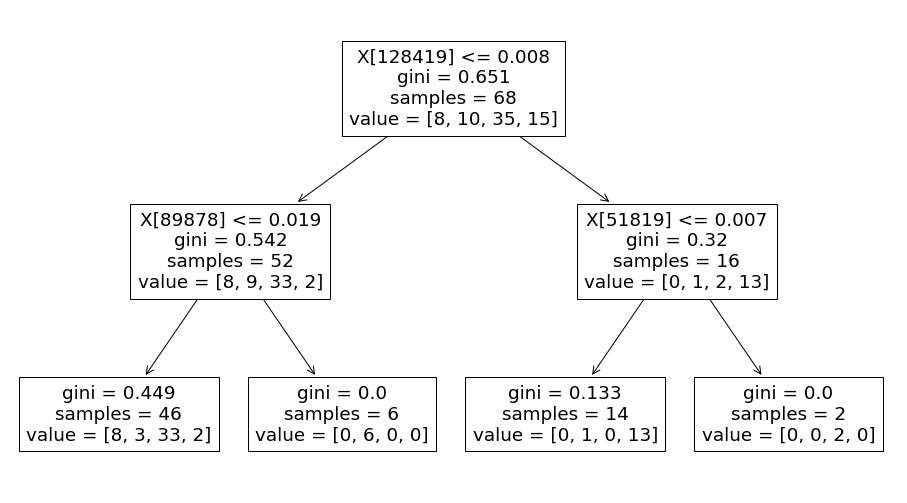

In [42]:
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

### Random Forest

In [79]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

rf = RandomForestClassifier(random_state=906, max_depth = 2).fit(X_train, y_train)

train['predicted'] = rf.predict(X_train)
test['predicted'] = rf.predict(X_test)

In [80]:
print(f'train score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

train score: 51.47%
validate score: 52.94%


In [81]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 51.47%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
JavaScript   8    10          35      15
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       0.00      0.00      0.00        10
  JavaScript       0.51      1.00      0.68        35
      Python       0.00      0.00      0.00        15

    accuracy                           0.51        68
   macro avg       0.13      0.25      0.17        68
weighted avg       0.26      0.51      0.35        68



In [82]:
#random forest scores that I don't trust rn - thank you xavier :) 
rf_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
rf_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Random Forest!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {rf_precision}')
print(f'recall score is {rf_recall}')

Scores for Random Forest!
---------------------------
accuracy score is 0.51
precision score is 0.13
recall score is 0.25


### Logistic Regression

In [83]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression(C=.6).fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [84]:
print(f'train score: {lm.score(X_train, y_train):.2%}')
print(f'validate score: {lm.score(X_validate, y_validate):.2%}')

train score: 52.94%
validate score: 52.94%


In [85]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 52.94%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
JavaScript   8    10          35      14
Python       0     0           0       1
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       0.00      0.00      0.00        10
  JavaScript       0.52      1.00      0.69        35
      Python       1.00      0.07      0.12        15

    accuracy                           0.53        68
   macro avg       0.38      0.27      0.20        68
weighted avg       0.49      0.53      0.38        68



In [86]:
#logistic regression scores
logit_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
logit_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {logit_precision}')
print(f'recall score is {logit_recall}')

Scores for Logistic Regression!
---------------------------
accuracy score is 0.53
precision score is 0.38
recall score is 0.27


### KNN

In [99]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

#use 9 for single
#10 for bigrams
#if forrest messes this up imma be sad
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

In [100]:
print(f'train score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

train score: 86.76%
validate score: 82.35%


In [101]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 86.76%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
Go           7     0           0       0
Java         0     6           1       1
JavaScript   1     3          33       1
Python       0     1           1      13
---
              precision    recall  f1-score   support

          Go       1.00      0.88      0.93         8
        Java       0.75      0.60      0.67        10
  JavaScript       0.87      0.94      0.90        35
      Python       0.87      0.87      0.87        15

    accuracy                           0.87        68
   macro avg       0.87      0.82      0.84        68
weighted avg       0.87      0.87      0.86        68



In [102]:
#knn scores
knn_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
knn_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for KNN!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {knn_precision}')
print(f'recall score is {knn_recall}')

Scores for KNN!
---------------------------
accuracy score is 0.87
precision score is 0.87
recall score is 0.82


### Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

nb = MultinomialNB(alpha=1.1).fit(X_train, y_train)

train['predicted'] = nb.predict(X_train)
test['predicted'] = nb.predict(X_test)

In [69]:
print(f'train score: {nb.score(X_train, y_train):.2%}')
print(f'validate score: {nb.score(X_validate, y_validate):.2%}')

train score: 58.82%
validate score: 52.94%


In [70]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 58.82%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
JavaScript   8    10          35      10
Python       0     0           0       5
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       0.00      0.00      0.00        10
  JavaScript       0.56      1.00      0.71        35
      Python       1.00      0.33      0.50        15

    accuracy                           0.59        68
   macro avg       0.39      0.33      0.30        68
weighted avg       0.51      0.59      0.48        68



In [71]:
#naive bayes scores
nb_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
nb_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Naive Bayes!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {nb_precision}')
print(f'recall score is {nb_recall}')

Scores for Naive Bayes!
---------------------------
accuracy score is 0.59
precision score is 0.39
recall score is 0.33


### Observing Features

In [104]:
rf.feature_importances_.shape

(332046,)

In [83]:
pd.Series(dict(zip(tfidf.get_feature_names(), rf.feature_importances_))).sort_values().tail(20)

binary           0.002614
content          0.002630
mit              0.002733
pypi             0.002787
target           0.003153
irc              0.003231
elasticsearch    0.003312
extract          0.003472
js               0.003660
supported        0.003737
see              0.003808
go               0.003813
javascript       0.004193
cloud            0.004473
defined          0.005083
http             0.005225
python           0.006219
list             0.006440
npm              0.007665
java             0.009428
dtype: float64

In [ ]:
#we fed all of our words, including bigrams and trigrams and the best performing model was KNN

# Test

In [105]:
print(f'Test score: {knn.score(X_test, y_test):.2%}')

Test score: 81.82%


# Below is Stuff I Did To Better My Prep

--- 

<AxesSubplot:ylabel='Frequency'>

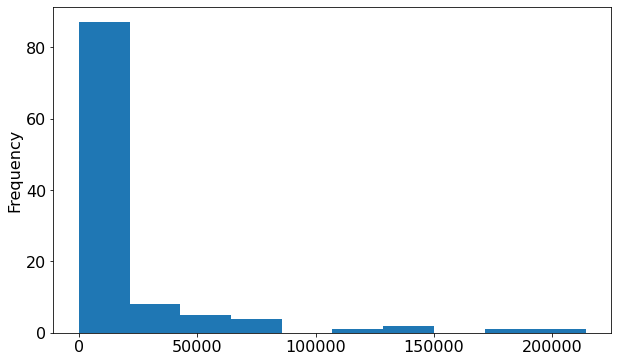

In [118]:
df['readme_length'] = df.clean.apply(len)
df.groupby('language').readme_length.mean()
df.message_length.plot.hist(figsize=(10,6))

In [119]:
df['word_count'] = df.clean.apply(str.split).apply(len)

<AxesSubplot:ylabel='Frequency'>

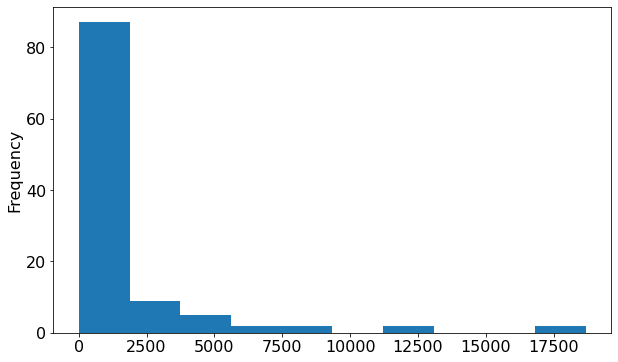

In [121]:
df.groupby('language').word_count.mean()
df.word_count.plot.hist(figsize=(10,6))

In [122]:
df.word_count.describe()

count      109.000000
mean      1564.614679
std       3104.667940
min          1.000000
25%        203.000000
50%        442.000000
75%       1143.000000
max      18698.000000
Name: word_count, dtype: float64

In [136]:
df.loc[df.word_count<=10]

,repo,language,readme_contents,original,clean,stemmed,lemmatized,message_length,readme_length,word_count
23,vercel/next.js,JavaScript,packages/next/README.md,packages/next/README.md,packagesnextreadmemd,packagesnextreadmemd,packagesnextreadmemd,20,20,1
96,parcel-bundler/parcel,JavaScript,./packages/core/parcel/README.md,./packages/core/parcel/README.md,packagescoreparcelreadmemd,packagescoreparcelreadmemd,packagescoreparcelreadmemd,26,26,1


In [137]:
df = df[df['word_count'] >= 10]

In [139]:
df.word_count.describe()

count      107.000000
mean      1593.841121
std       3126.313801
min         47.000000
25%        208.500000
50%        449.000000
75%       1179.500000
max      18698.000000
Name: word_count, dtype: float64

### Test The New Prep 

In [2]:
df = a.get_github_data()

In [3]:
df = p.prep_github_data(df, 'readme_contents')

In [8]:
#df = df.reset_index(drop=True)

In [4]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5199,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5633,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11976,561


In [ ]:
# def prep_github_data(df):
#     df = df.drop_duplicates() 

    
#     javascript_words = basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
#     python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
#     java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
#     go_words = basic_clean(' '.join(df[df.language == 'Go'].readme_contents))
    
#     language_words = [javascript_words, python_words, go_words, java_words]
    
#     for i in language_words:
#         i = p.remove_stopwords(i)
        
#         return javascript_words, python_words, java_words, go_words

In [4]:
# extra_words = []
# exclude_words = []

In [5]:
# df = df['readme_contents'].apply(p.basic_clean)\
#                     .apply(p.tokenize)\
#                     .apply(lambda x: p.remove_stopwords(x, extra_words, exclude_words))

In [37]:
javascript_words = p.basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))

In [30]:
javascript_words = p.tokenize(javascript_words)

In [38]:
javascript_words = p.remove_stopwords(javascript_words)

In [39]:
pd.Series(javascript_words.split()).value_counts()

source                               947
javascript                           827
icon                                 433
const                                430
freewarefreeware                     395
                                    ... 
pagekitehttpspagekitenet               1
alignleftnbspghanatdtd                 1
texthttpwwwsublimetextcom3             1
roomhttpsgitterimwebpackwebpack        1
maskhttpsgithubcom2ndalphagasmask      1
Length: 23400, dtype: int64

In [6]:
python_words = p.basic_clean(' '.join(df[df.language == 'Python'].readme_contents))

In [7]:
python_words = p.remove_stopwords(python_words)

In [ ]:
javascript_words = p.tokenize(javascript_words)

In [8]:
pd.Series(python_words.split()).value_counts()

yes                                               1022
python                                             627
unknown                                            626
data                                               515
learning                                           424
                                                  ... 
visualizationjavadataanalysisdatavisualization       1
wmagnus                                              1
pythontimblhttpsgithubcomproyconpythontimbl          1
portugues                                            1
09                                                   1
Length: 14072, dtype: int64

In [10]:
java_words = p.basic_clean(' '.join(df[df.language == 'Java'].readme_contents))

In [11]:
java_words = p.remove_stopwords(java_words)

In [12]:
pd.Series(java_words.split()).value_counts()

td                                                                    182
aligncentera                                                          172
altbr                                                                 172
width100px                                                            172
titlecodeatd                                                          127
                                                                     ... 
9pujiaxin33jxsegmentedviewhttpsgithubcompujiaxin33jxsegmentedviewa      1
axios                                                                   1
904c0203                                                                1
srchttpsavatars1githubusercontentcomu12736734v4s100                     1
denze                                                                   1
Length: 7220, dtype: int64

In [13]:
go_words = p.basic_clean(' '.join(df[df.language == 'Go'].readme_contents))

In [14]:
go_words = p.remove_stopwords(go_words)

In [15]:
pd.Series(go_words.split()).value_counts()

go                                                1120
library                                            360
golang                                             218
package                                            188
simple                                             173
                                                  ... 
19216812                                             1
default_bits                                         1
bindmethod                                           1
configurohttpsgithubcomsherifabdlnabyconfiguro       1
htmlindextmplnil                                     1
Length: 9236, dtype: int64

In [19]:
all_words = p.basic_clean(' '.join(df.readme_contents))

In [20]:
all_words = p.remove_stopwords(all_words)

In [21]:
pd.Series(all_words.split()).value_counts()

go                                                          1312
source                                                      1117
yes                                                         1025
javascript                                                   877
data                                                         829
                                                            ... 
thematic                                                       1
xsrvhttpsxsrvreadthedocsio                                     1
45nilaodabbdownhttpsgithubcomnilaodabbdownbilibili             1
nowrapcodehttpsiptvorggithubioiptvcountriesmtm3ucodetdtr       1
binarywiki                                                     1
Length: 45127, dtype: int64

In [42]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts()

(freewarefreeware, icon)     364
(opensource, softwareoss)    234
(open, source)               166
(td, aligncentera)           151
(width100px, altbr)          151
                            ... 
(erregistroren, bat)           1
(rename, new)                  1
(technologies, therefore)      1
(legacy, front)                1
(upon, guidelines)             1
Length: 60925, dtype: int64

In [43]:
pd.Series(nltk.bigrams(python_words.split())).value_counts()

(yes, unknown)         536
(apikey, yes)          319
(machine, learning)    276
(yes, yes)             213
(codeblock, bash)      132
                      ... 
(convert, curl)          1
(use, part)              1
(kb, 20)                 1
(net, framework)         1
(name, also)             1
Length: 40791, dtype: int64

In [44]:
pd.Series(nltk.bigrams(java_words.split())).value_counts()

(width100px, altbr)      172
(td, aligncentera)       172
(titlecodeatd, td)       100
(tr, td)                  45
(tr, tr)                  42
                        ... 
(player, application)      1
(schedulers, rxjava)       1
(left, towards)            1
(283, movezeroes)          1
(features, added)          1
Length: 11518, dtype: int64

In [45]:
pd.Series(nltk.bigrams(go_words.split())).value_counts()

(go, library)                                    66
(funcc, gincontext)                              62
(written, go)                                    56
(go, package)                                    55
(func, main)                                     51
                                                 ..
(materialized, path)                              1
(storing, resizing)                               1
(gologhttpsgithubcommlimaloureirogolog, easy)     1
(georeplicated, transactional)                    1
(inside, use)                                     1
Length: 24748, dtype: int64

In [49]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()

In [ ]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .sort_values(by='javascript_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

In [14]:
df.language.value_counts()

JavaScript    55
Python        24
Java          15
Go            13
Name: language, dtype: int64

In [15]:
X_train

<85x44507 sparse matrix of type '<class 'numpy.float64'>'
	with 53026 stored elements in Compressed Sparse Row format>

In [16]:
X_train.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
pd.DataFrame(X_train.todense(), columns=tfidf.get_feature_names()).language.value_counts()

0.000000    63
0.018179     1
0.002512     1
0.009970     1
0.019258     1
0.001423     1
0.013038     1
0.017892     1
0.003175     1
0.116240     1
0.029292     1
0.039966     1
0.027663     1
0.002206     1
0.066826     1
0.179194     1
0.014505     1
0.023300     1
0.055455     1
0.043639     1
0.012896     1
0.031194     1
0.038668     1
Name: language, dtype: int64